In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv('dataset/train_LZdllcl.csv')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

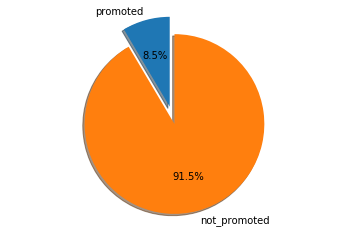

In [5]:
labels = ['promoted', 'not_promoted']
sizes = [df.is_promoted.value_counts()[1], df.is_promoted.value_counts()[0]]
explode = [0, 0.2]

fig1,ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [6]:
df['education'] = df['education'].fillna(value="Bachelor's")
df['previous_year_rating'] = df['previous_year_rating'].fillna(value=df['previous_year_rating'].mean())

In [7]:
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [8]:
one_hot = pd.get_dummies(df['department'])
df = df.drop('department', axis=1)
df = df.join(one_hot)

one_hot = pd.get_dummies(df['region'])
df = df.drop('region', axis=1)
df = df.join(one_hot)

one_hot = pd.get_dummies(df['education'])
df = df.drop('education', axis=1)
df = df.join(one_hot)

one_hot = pd.get_dummies(df['gender'])
df = df.drop('gender', axis=1)
df = df.join(one_hot)

one_hot = pd.get_dummies(df['recruitment_channel'])
df = df.drop('recruitment_channel', axis=1)
df = df.join(one_hot)

In [9]:
features = df[['no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score','Analytics', 'Finance', 'HR',
       'Legal', 'Operations', 'Procurement', 'R&D', 'Sales & Marketing',
       'Technology', 'region_1', 'region_10', 'region_11', 'region_12',
       'region_13', 'region_14', 'region_15', 'region_16', 'region_17',
       'region_18', 'region_19', 'region_2', 'region_20', 'region_21',
       'region_22', 'region_23', 'region_24', 'region_25', 'region_26',
       'region_27', 'region_28', 'region_29', 'region_3', 'region_30',
       'region_31', 'region_32', 'region_33', 'region_34', 'region_4',
       'region_5', 'region_6', 'region_7', 'region_8', 'region_9',
       "Bachelor's", 'Below Secondary', "Master's & above", 'f', 'm', 'other',
       'referred', 'sourcing']]

target = df['is_promoted']

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
features = scaler.fit_transform(features)

In [11]:
decision_tree_cls = DecisionTreeClassifier()

In [12]:
scores = list()
cv = KFold(n_splits=10, random_state=42, shuffle=False)

for train_index, test_index in cv.split(features):
    X_train, X_test, y_train, y_test = features[train_index], features[test_index], target[train_index], target[test_index]
    decision_tree_cls.fit(X_train, y_train)
    scores.append(decision_tree_cls.score(X_test, y_test))

In [13]:
np.mean(scores)

0.8985548450719607

In [14]:
df_test = pd.read_csv('dataset/test_2umaH9m.csv')

In [15]:
df_test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [16]:
df['education'] = df_test['education'].fillna(value="Bachelor's")
df_test['previous_year_rating'] = df_test['previous_year_rating'].fillna(value=df_test['previous_year_rating'].mean())

In [17]:
one_hot = pd.get_dummies(df_test['department'])
df_test = df_test.drop('department', axis=1)
df_test = df_test.join(one_hot)

one_hot = pd.get_dummies(df_test['region'])
df_test = df_test.drop('region', axis=1)
df_test = df_test.join(one_hot)

one_hot = pd.get_dummies(df_test['education'])
df_test = df_test.drop('education', axis=1)
df_test = df_test.join(one_hot)

one_hot = pd.get_dummies(df_test['gender'])
df_test = df_test.drop('gender', axis=1)
df_test = df_test.join(one_hot)

one_hot = pd.get_dummies(df_test['recruitment_channel'])
df_test = df_test.drop('recruitment_channel', axis=1)
df_test = df_test.join(one_hot)

In [18]:
features = df_test[['no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score','Analytics', 'Finance', 'HR',
       'Legal', 'Operations', 'Procurement', 'R&D', 'Sales & Marketing',
       'Technology', 'region_1', 'region_10', 'region_11', 'region_12',
       'region_13', 'region_14', 'region_15', 'region_16', 'region_17',
       'region_18', 'region_19', 'region_2', 'region_20', 'region_21',
       'region_22', 'region_23', 'region_24', 'region_25', 'region_26',
       'region_27', 'region_28', 'region_29', 'region_3', 'region_30',
       'region_31', 'region_32', 'region_33', 'region_34', 'region_4',
       'region_5', 'region_6', 'region_7', 'region_8', 'region_9',
       "Bachelor's", 'Below Secondary', "Master's & above", 'f', 'm', 'other',
       'referred', 'sourcing']]

In [19]:
scaler = MinMaxScaler(feature_range=(0,1))
features = scaler.fit_transform(features)

In [20]:
y_pred = decision_tree_cls.predict(features)

In [21]:
submission = pd.DataFrame({
        "employee_id": df_test['employee_id'],
        "is_promoted": y_pred
    })
submission.to_csv('submission.csv', index=False)

In [26]:
submission['is_promoted'].value_counts()

0    21283
1     2207
Name: is_promoted, dtype: int64